In [1]:
import datetime
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

ROOT_DIR = str(Path().resolve().parent)

sys.path.append('../')
#sys.path.append(f"{ROOT_DIR}/genomic_spot/")
plt.style.use(f'{ROOT_DIR}/notebooks/project.mplstyle')

# Running on Genomes

In [2]:
contig_filepath = f"{ROOT_DIR}/tests/test_data/GCA_000172155.1_ASM17215v1_genomic.fna.gz"
protein_filepath = f"{ROOT_DIR}/tests/test_data/GCA_000172155.1_ASM17215v1_protein.faa.gz"

## Prediction of growth conditions



In [3]:
from genomic_spot.genomic_spot import predict_physicochemistry

print(datetime.datetime.now())
predictions, genome_features = predict_physicochemistry(
        fna_path=contig_filepath,
        faa_path=protein_filepath,
        features_json=None,
        path_to_models=f"{ROOT_DIR}/models",
        #save_intermediate=False,
    )
print(datetime.datetime.now())

pd.DataFrame(predictions).T.sort_index()

2024-02-22 11:10:55 INFO Measuring features from:
	/Users/tylerbarnum/cultivarium/predict-media-physicochemistry/tests/test_data/GCA_000172155.1_ASM17215v1_genomic.fna.gz
	/Users/tylerbarnum/cultivarium/predict-media-physicochemistry/tests/test_data/GCA_000172155.1_ASM17215v1_protein.faa.gz
2024-02-22 11:10:55 INFO GCA_000172155.1_ASM17215v1_genomic.fna.gz: Identifying protein localization


2024-02-22 11:10:55.850332


2024-02-22 11:10:59 INFO GCA_000172155.1_ASM17215v1_genomic.fna.gz: Collecting genome statistics
2024-02-22 11:11:01 INFO GCA_000172155.1_ASM17215v1_genomic.fna.gz: Collecting protein statistics
2024-02-22 11:11:01 INFO Predicting growth conditions


2024-02-22 11:11:01.217955


/Users/tylerbarnum/cultivarium/predict-media-physicochemistry/venv_physicochemistry/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneClassSVM was fitted with feature names
  warnings.warn(
/Users/tylerbarnum/cultivarium/predict-media-physicochemistry/venv_physicochemistry/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneClassSVM was fitted with feature names
  warnings.warn(
/Users/tylerbarnum/cultivarium/predict-media-physicochemistry/venv_physicochemistry/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneClassSVM was fitted with feature names
  warnings.warn(
/Users/tylerbarnum/cultivarium/predict-media-physicochemistry/venv_physicochemistry/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneClassSVM was fitted with feature names
  warnings.warn(
/Users/tylerbarn

,value,error,is_novel,warning,units
oxygen,0.95858,None,False,None,prob. tolerant
ph_max,9.323984,1.164105,False,None,pH
ph_min,5.551598,1.000353,False,None,pH
ph_optimum,7.394857,0.873383,False,None,pH
salinity_max,5.461296,3.529545,False,None,% w/v NaCl
salinity_min,0,1.393914,False,min_exceeded,% w/v NaCl
salinity_optimum,0.933838,1.496416,False,None,% w/v NaCl
temperature_max,35.841931,5.683129,False,None,C
temperature_min,9.91551,6.652982,False,None,C
temperature_optimum,27.251598,5.770348,False,None,C


In [34]:
p_oxy = predictions["oxygen"]["value"] 
if p_oxy > 0.5:
    predictions["oxygen"]["error"] = p_oxy
    predictions["oxygen"]["value"] = "Aerobe or Facultative Anaerobe"
else:
    predictions["oxygen"]["error"] = 1 - p_oxy
    predictions["oxygen"]["value"] = "Obligate Anaerobe"

In [39]:
predictions["oxygen"]["value"] = "Aerobe (Obligate or Facultative)"

In [40]:
new_dict = pd.DataFrame(predictions).T.sort_index().T.to_dict()


d = {'GCA_000172155.1' : new_dict}
d

{'GCA_000172155.1': {'oxygen': {'value': 'Aerobe (Obligate or Facultative)',
   'error': 0.9585800065059981,
   'is_novel': False,
   'warning': None,
   'units': 'prob. tolerant'},
  'ph_max': {'value': 9.323984316608392,
   'error': 1.1641051810128815,
   'is_novel': False,
   'warning': None,
   'units': 'pH'},
  'ph_min': {'value': 5.551597675342799,
   'error': 1.0003533027697962,
   'is_novel': False,
   'warning': None,
   'units': 'pH'},
  'ph_optimum': {'value': 7.394857308596719,
   'error': 0.8733828062639658,
   'is_novel': False,
   'warning': None,
   'units': 'pH'},
  'salinity_max': {'value': 5.461295500725762,
   'error': 3.529545338479014,
   'is_novel': False,
   'warning': None,
   'units': '% w/v NaCl'},
  'salinity_min': {'value': 0,
   'error': 1.3939135355643077,
   'is_novel': False,
   'warning': 'min_exceeded',
   'units': '% w/v NaCl'},
  'salinity_optimum': {'value': 0.9338380535668405,
   'error': 1.4964162159844046,
   'is_novel': False,
   'warning': Non

In [4]:
print(pd.DataFrame(predictions).T.sort_index())

                         value     error is_novel       warning  \
oxygen                 0.95858      None    False          None   
ph_max                9.323984  1.164105    False          None   
ph_min                5.551598  1.000353    False          None   
ph_optimum            7.394857  0.873383    False          None   
salinity_max          5.461296  3.529545    False          None   
salinity_min                 0  1.393914    False  min_exceeded   
salinity_optimum      0.933838  1.496416    False          None   
temperature_max      35.841931  5.683129    False          None   
temperature_min        9.91551  6.652982    False          None   
temperature_optimum  27.251598  5.770348    False          None   

                              units  
oxygen               prob. tolerant  
ph_max                           pH  
ph_min                           pH  
ph_optimum                       pH  
salinity_max             % w/v NaCl  
salinity_min             % w/v NaC

In [5]:

# print(datetime.datetime.now())
# predictions, genome_features = predict_physicochemistry(
#         fna_path=contig_filepath,
#         faa_path=protein_filepath,
#         features_json='/Users/tylerbarnum/cultivarium/external/gtdb/r214/features-v4/GCA_000007325.features.json',
#         path_to_models=f"{ROOT_DIR}/models",
#         #save_intermediate=False,
#     )
# print(datetime.datetime.now())

# pd.DataFrame(predictions).T.sort_index()

## Measure Genome Features

### 1 Protein Sequence

In [6]:
from genomic_spot.bioinformatics.protein import Protein

sequence = ''.join("""MAAQDVKQQTPYRVIQLEWDAEKGERNEAVGNFDELVTHHPKSNSDAHLVDGKVVGGQAG
RTLGVVGGEIQEIEVSKAGKDYGLRPDQVLLKKDFMLEDSRLPSGPSSRSLDVPSPVAGV
VGTVNTSKGLVDVLDREGGDVILRVRHMSPLHVKAGDQVEYGQALGVQGKQATGAIHVHM
EVDSRYYQHYENYVGDLVSGRLSIDAERRDRGIEPRPFVDDGTIRIGGSSEMVQKVQQTL
NAEGYRGADNQPLQEDGVYRLSMQAAVINYQQAHGLSQTGDIDPATLQQIAPRTFPPELN
REDHNATPTYRNLQGAVPSQDPLHRQAEEDVRRLEQSLGRDYDDNSARLAASSAHLAKAN
GLTQIDHVVLSNQTAAVGKGENVFVVQGALDNPAHLMAHMKTSDAIAQPVEQSLSQLQTL
SETQRQQQAQQQSQQQDQQQLSAPQHRMV""".split('\n'))

protein = Protein(sequence)
protein.protein_metrics()

{'pi': 5.382106971740723,
 'zc': 0.19821826280623608,
 'nh2o': 0.07137639198218272,
 'gravy': -0.6514476614699332,
 'thermostable_freq': 0.356347438752784,
 'length': 449,
 'is_exported': False,
 'aa_M': 0.0200445434298441,
 'aa_A': 0.08463251670378619,
 'aa_Q': 0.10690423162583519,
 'aa_D': 0.0757238307349666,
 'aa_V': 0.0935412026726058,
 'aa_K': 0.0334075723830735,
 'aa_T': 0.0400890868596882,
 'aa_P': 0.0467706013363029,
 'aa_Y': 0.026726057906458798,
 'aa_R': 0.062360801781737196,
 'aa_I': 0.031180400890868598,
 'aa_L': 0.08240534521158129,
 'aa_E': 0.05790645879732739,
 'aa_W': 0.0022271714922048997,
 'aa_G': 0.08685968819599109,
 'aa_N': 0.035634743875278395,
 'aa_F': 0.011135857461024499,
 'aa_H': 0.035634743875278395,
 'aa_S': 0.066815144766147}

### 1 Signal Peptide Prediction

In [7]:
from genomic_spot.bioinformatics.signal_peptide import SignalPeptideHMM

partial_sequence = 'MNKTLIAAAVAGIVLLASNAQAQTVPEGYQLQQVLMMSRHNLRAPLANNG'

signal_peptide_model = SignalPeptideHMM()
is_exported, signal_end_index = signal_peptide_model.predict_signal_peptide(partial_sequence)
signal_peptide = partial_sequence[:signal_end_index+1]
is_exported, signal_peptide

(True, 'MNKTLIAAAVAGIVLLASNAQA')

In [8]:
formatted_sequence = signal_peptide_model._format_protein_sequence(partial_sequence)
pred_states, log_prob = signal_peptide_model._predict_hidden_states(formatted_sequence)
print(log_prob)
for aa, state in zip(partial_sequence[:len(formatted_sequence)], pred_states):
    print(aa,state)

-130.73482767354764
M B
N N3
K N2
T N1
L H
I H
A H
A H
A H
V H
A H
G H
I H
V H
L H
L H
A H
S C
N C
A C3
Q C2
A C1
Q M
T M
V M
P M
E M
G M
Y M
Q M
L M
Q M
Q M
V M
L M
M M
M M
S M
R M
H M
N M
L M
R M
A M
P M
L M
A M
N M
N M
G M


### 1 DNA Sequence


In [9]:
from genomic_spot.bioinformatics.dna import DNA

sequence = "GGATGGACGGAGGAATTCCTCAAGGAAGTCGGGCCCGCGCTGGTGGTACTCGGTCCAGGCTTCTTGCACGAAGAAGTCTCCGACCGCGCCTCTCTCCACCCTCCTGGCAAAATCGGCCAGTGACTTGATGCCGATGTGGTAGATGAAGCCGGTGTCGAGTACGCCCTTGGCGAAGGTCGGGTCCGCCAGCCTCTCGGGAAAATTTTCTTCGATGTTCAGATAGTAGCCGCGCATGCTGACGCCACGGCTATCTAAAGTGAACATTCCGTCCTTCAGAATGCAATCGGCATGGTGCCAAAATCCAGAGCCCACCGCGCTGGCAATCTTGTTGTCGTCAACTGCGTCGGATCGGACGAGGCACTTCGTGAACGGCGCCGGCAATTCGGACCGTCGAGTGTAATTACGGATTGCGGACCCAGACGGGCGCGTGGCGTGGCCGTTATGCCCAGCATTGACGGAGAACAGGTGGATTGCCCCCACTCCACCCGGAAAGCGTGAGATAAACTCTCGGATCGTGTCGTCGTTGCGCAGTAAAATAAATTCGTCAACATCGAGAAATATGTAATTACGGCTCAGATGTTTAAA"
dna = DNA(sequence)
dna.nucleotide_metrics()

{'nt_length': 585,
 'pur_pyr_transition_freq': 0.4897260273972603,
 'nt_C': 0.558974358974359,
 'nt_A': 0.441025641025641}

### All Protein and DNA Sequences

Note: It is expected and good to see NaN for many features because they cannot be computed by cellular localization.

In [10]:
from genomic_spot.bioinformatics.genome import Genome
from genomic_spot.bioinformatics.signal_peptide import SignalPeptideHMM


genome_calc = Genome(
    contig_filepath=contig_filepath, 
    protein_filepath=protein_filepath,
)

print(datetime.datetime.now())
genome_features = genome_calc.measure_genome_features()
print(datetime.datetime.now())

2024-02-22 11:14:34 INFO GCA_000172155.1_ASM17215v1_genomic.fna.gz: Identifying protein localization


2024-02-22 11:14:34.443014


2024-02-22 11:14:37 INFO GCA_000172155.1_ASM17215v1_genomic.fna.gz: Collecting genome statistics
2024-02-22 11:14:38 INFO GCA_000172155.1_ASM17215v1_genomic.fna.gz: Collecting protein statistics


2024-02-22 11:14:38.915496


In [11]:
genome_features.keys()

dict_keys(['all', 'extracellular_soluble', 'intracellular_soluble', 'membrane', 'diff_extra_intra'])

In [12]:
df_genome = pd.DataFrame(genome_features)
df_genome.head(30)

,all,extracellular_soluble,intracellular_soluble,membrane,diff_extra_intra
nt_length,8.220859e+06,NaN,NaN,NaN,NaN
pur_pyr_transition_freq,4.796972e-01,NaN,NaN,NaN,NaN
nt_C,6.031152e-01,NaN,NaN,NaN,NaN
nt_A,3.968848e-01,NaN,NaN,NaN,NaN
total_proteins,6.519000e+03,635.000000,5.336000e+03,548.000000,-4.701000e+03
total_protein_length,2.366909e+06,285520.000000,1.921398e+06,159991.000000,-1.635878e+06
pis_acidic,1.988035e-01,0.215748,2.113943e-01,0.056569,4.353729e-03
pis_neutral,4.914864e-01,0.615748,5.018741e-01,0.246350,1.138740e-01
pis_basic,3.097101e-01,0.168504,2.867316e-01,0.697080,-1.182277e-01
pis_3_4,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00


### All Proteins

In [13]:
protein_data = genome_calc.protein_data()
df_proteins = pd.DataFrame(protein_data).T
df_proteins

,pi,zc,nh2o,gravy,thermostable_freq,length,is_exported,aa_M,aa_S,aa_L,...,aa_C,aa_G,aa_A,aa_H,aa_E,aa_R,aa_Q,aa_N,aa_F,aa_W
ABIZ01000001.1_1,7.551992,-0.179457,0.014524,-0.33754,0.386581,626,False,0.025559,0.059105,0.089457,...,0.015974,0.08147,0.087859,0.017572,0.070288,0.063898,0.044728,0.031949,0.031949,0.01278
ABIZ01000001.1_2,11.364825,-0.744643,0.070964,0.251786,0.464286,56,False,0.017857,0.089286,0.125,...,0.017857,0.107143,0.089286,0.017857,0.017857,0.107143,NaN,0.035714,0.017857,0.035714
ABIZ01000001.1_3,6.49581,-0.276424,-0.020354,-0.144702,0.39404,302,False,0.023179,0.046358,0.112583,...,0.016556,0.092715,0.096026,0.043046,0.062914,0.05298,0.019868,0.039735,0.029801,0.013245
ABIZ01000001.1_4,6.166826,-0.120446,-0.054786,-0.380501,0.395543,359,False,0.022284,0.061281,0.094708,...,0.011142,0.075209,0.075209,0.038997,0.066852,0.064067,0.030641,0.050139,0.038997,0.011142
ABIZ01000001.1_5,5.399329,-0.281062,0.052735,-0.257522,0.411504,226,False,0.00885,0.070796,0.132743,...,0.022124,0.070796,0.110619,0.00885,0.070796,0.084071,0.053097,0.017699,0.030973,0.022124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ABIZ01000001.1_6515,9.24749,-0.947007,-0.111161,0.443796,0.394161,137,False,0.043796,0.051095,0.109489,...,0.007299,0.072993,0.153285,0.014599,0.021898,0.065693,0.029197,0.007299,0.058394,0.029197
ABIZ01000001.1_6516,8.159264,0.033143,0.083814,-0.695714,0.414286,70,False,0.014286,0.057143,0.114286,...,NaN,0.057143,0.057143,0.042857,0.1,0.071429,0.071429,0.057143,0.028571,NaN
ABIZ01000001.1_6517,5.395009,-0.4275,0.021831,-0.223529,0.433824,136,False,0.036765,0.051471,0.132353,...,0.029412,0.095588,0.066176,0.014706,0.080882,0.095588,0.051471,0.014706,0.029412,0.022059
ABIZ01000001.1_6518,4.872716,-0.37697,-0.011582,-0.013636,0.4,330,False,0.045455,0.060606,0.075758,...,0.024242,0.078788,0.087879,0.021212,0.075758,0.054545,0.018182,0.036364,0.036364,0.015152


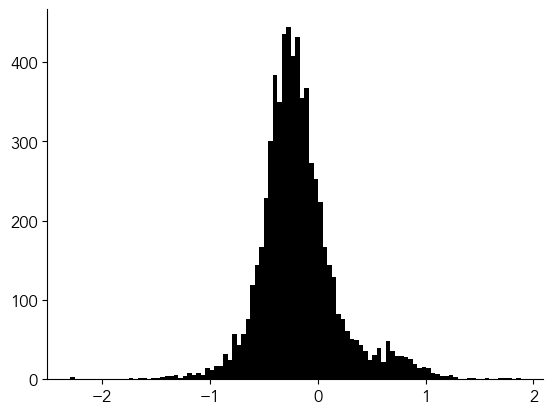

In [13]:
x = 'gravy'

X = df_proteins[x].values 

fig, ax = plt.subplots()
ax.hist(X, bins=100)
#ax.axvline(0.5)

plt.show()

# Model Training

## Balancing a Dataset by Taxonomy

In [14]:
#import sys
#sys.path.append('../src/')
with open('../tests/test_data/test_genome_accessions.txt', 'r') as fh:
    genomes = [line.strip().split('.')[0] for line in fh.readlines()]

In [16]:
from genomic_spot.model_training.taxonomy import TaxonomyGTDB


taxonomy = TaxonomyGTDB()
len(taxonomy.taxonomy_dict.keys())

402709

In [17]:
accession = list(taxonomy.taxonomy_dict.keys())[0]
{accession : taxonomy.taxonomy_dict['GCA_019399425']}

{'GCA_000979555': ('Bacteria',
  'Bacillota',
  'Bacilli',
  'Lactobacillales',
  'Streptococcaceae',
  'Streptococcus',
  'Streptococcus pneumoniae')}

In [18]:
#taxonomy.taxonomy_dict[]
list(taxonomy.taxonomy_dict.keys())[190000]

'GCA_017565965'

In [19]:

from genomic_spot.model_training.balance import BalanceTaxa

taxonomy = TaxonomyGTDB()
balancer = BalanceTaxa(taxonomy=taxonomy)
balanced_genomes = balancer.balance_dataset(
    genomes=genomes,
    proportion_to_keep=0.5,
    diversity_rank="species"
)
len(balanced_genomes) / len(genomes)

0.49996937588044343

## Partitioning (Splitting) a Dataset by Taxonomy

In [21]:
from genomic_spot.model_training.partition import PartitionTaxa

partitioner = PartitionTaxa(
    taxonomy=taxonomy,
    partition_rank='family',
    #iteration_rank='phylum',
    diversity_rank='genus',
)

partitioned_genomes = partitioner.partition(balanced_genomes, partition_size=0.2)
nonpartitioned_genomes = sorted(set(balanced_genomes).difference(partitioned_genomes))
extended_partitioned_genomes = sorted(partitioner.find_relatives_of_partitioned_set_in_reference(partitioned_genomes))

print(len(partitioned_genomes) / len(balanced_genomes), len(nonpartitioned_genomes) / len(balanced_genomes))
print(len(partitioned_genomes), len(extended_partitioned_genomes))

0.20237657723876026 0.7976234227612398
1652 41878


In [23]:
len(balanced_genomes)

8163

In [24]:
balancer = BalanceTaxa(taxonomy=taxonomy)

In [25]:
rng = np.random.default_rng(seed=12345)

genomes = sorted(partitioned_genomes)
genomes1 = rng.choice(
            genomes,
            1000,
            replace=False,
        )
rng = np.random.default_rng(seed=12345)

genomes2 = rng.choice(
            genomes,
            1000,
            replace=False,
        )
rng = np.random.default_rng(seed=12345)

genomes3 = rng.choice(
            genomes,
            1000,
            replace=True,
        )
len(set(genomes1).intersection(set(genomes2))) / 1000
genomes1[0:4], genomes2[0:4], genomes3[0:4]

(array(['GCA_016587375', 'GCA_001699645', 'GCA_900108095', 'GCA_000184345'],
       dtype='<U13'),
 array(['GCA_016587375', 'GCA_001699645', 'GCA_900108095', 'GCA_000184345'],
       dtype='<U13'),
 array(['GCA_013388295', 'GCA_001278945', 'GCA_015707995', 'GCA_001643975'],
       dtype='<U13'))

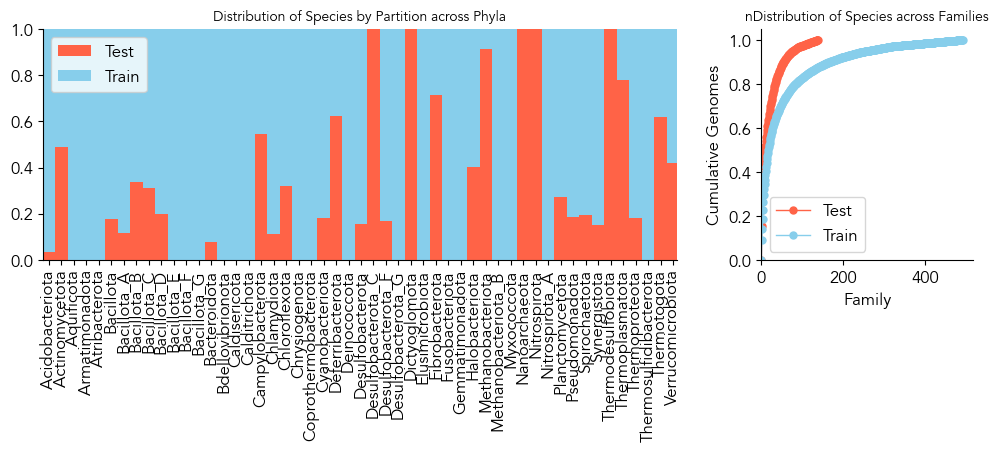

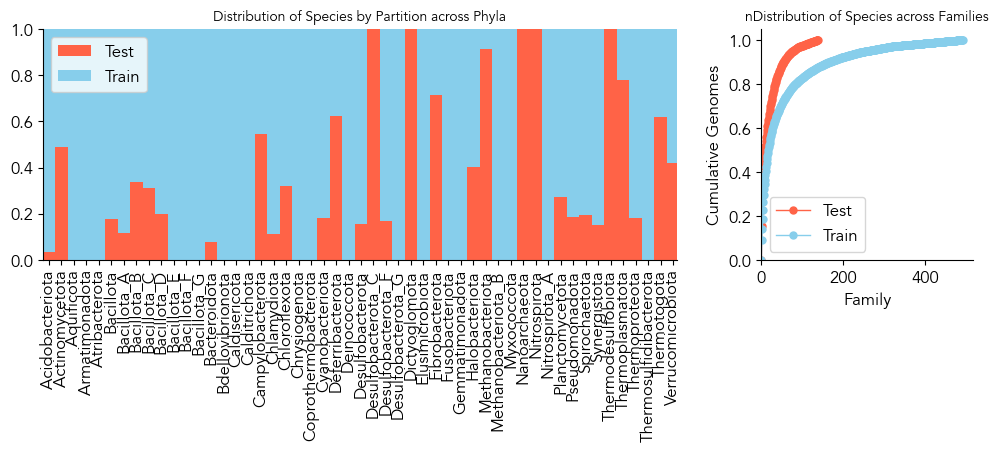

In [26]:
for i in range(2):

    test_set = partitioner.partition(balanced_genomes, partition_size=0.2)
    
    train_set = sorted(set(balanced_genomes).difference(test_set))
    proportion_dict = balancer.assess_proportion(subset_genomes=test_set, reference_genomes=test_set.union(train_set), rank='phylum')
    test_diversity = taxonomy.measure_diversity(query_rank='family', diversity_rank='species', subset_genomes=list(test_set))
    train_diversity = taxonomy.measure_diversity(query_rank='family', diversity_rank='species', subset_genomes=list(train_set))
    
    
    fig, axes = plt.subplots(1,2, figsize=(12,3),gridspec_kw={'width_ratios' : (3,1)})
    test_color = 'tomato'
    train_color = 'skyblue'
    ax = axes[0]
    df_counts = pd.DataFrame.from_dict(proportion_dict, orient='index').sort_index()
    df_counts.columns = ['Test']
    df_counts['Train'] = 1 - df_counts['Test']
    ax.set_title(f"Distribution of Species by Partition across Phyla", fontsize=10)
    df_counts.plot.bar(ax=ax, width=1, color=[test_color, train_color], edgecolor='None', stacked=True, legend=False)
    ax.set_ylim([0,1])
    ax.set_xlim([-0.5,ax.get_xlim()[1]-0.45])
    
    ax = axes[1]
    X1 = [0] + list(pd.DataFrame.from_dict(test_diversity, orient='index').sort_values(by=0, ascending=False)[0].values)
    X2 = [0] + list(pd.DataFrame.from_dict(train_diversity, orient='index').sort_values(by=0, ascending=False)[0].values)
    ax.set_title(f"nDistribution of Species across Families", fontsize=10)
    ax.plot(range(len(X1)), np.cumsum(X1) / np.sum(X1), marker='.', color=test_color, label='Test')
    ax.plot(range(len(X2)), np.cumsum(X2) / np.sum(X2), marker='.', color=train_color, label='Train')
    ax.set_ylabel('Cumulative Genomes')
    ax.set_xlabel('Family')
    ax.set_ylim([0,ax.get_ylim()[1]])
    ax.set_xlim([0,ax.get_xlim()[1]])
    
    for ax in axes:
        ax.legend(frameon=True)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
    plt.show() 

In [27]:
kfold = 5
cv_sets = []  # training, validation
remaining_genomes = set(genomes)
fold_sizes = []
for k in range(kfold):
    validation_partition_size = 1 / (kfold - k)
    partitioned_genomes = partitioner.partition(remaining_genomes, partition_size=validation_partition_size)
    if k < kfold - 1:
        remaining_genomes = set(remaining_genomes).difference(partitioned_genomes)
    else:
        partitioned_genomes = remaining_genomes
    validation_indices = np.in1d(genomes, np.array(list(partitioned_genomes))).nonzero()[0]
    training_indices = np.in1d(genomes, np.array(list(set(genomes).difference(partitioned_genomes)))).nonzero()[0]
    cv_sets.append((training_indices, validation_indices))
    fold_sizes.append(len(partitioned_genomes) / len(genomes))
    # print( len(partitioned_genomes), len(remaining_genomes),  validation_partition_size, len(partitioned_genomes) / len(genomes), )
#logging.info("Fold sizes for k=%i: %s", kfold, ", ".join([f"{f:.2f}" for f in fold_sizes]))
# Check
n_valid = 0
for indices_train, indices_valid in cv_sets:
    n_valid += len(indices_valid)
assert n_valid == len(genomes)



In [28]:
partitioned_genomes = partitioner.partition(balanced_genomes, partition_size=0.2)
print(len(partitioned_genomes))
partitioned_genomes = partitioner.partition(balanced_genomes, partition_size=0.2)


1652


In [29]:
# check for data leakage
partitioned_taxa = set(taxonomy.taxa_of_genomes(partitioned_genomes, partitioner.partition_rank))
nonpartitioned_taxa = set(taxonomy.taxa_of_genomes(nonpartitioned_genomes, partitioner.partition_rank))
assert len(partitioned_taxa.intersection(nonpartitioned_taxa)) == 0

# check partitioned genomes all present
len(set(partitioned_genomes).intersection(set(extended_partitioned_genomes))) == len(set(partitioned_genomes))
assert len(set(partitioned_genomes).difference(set(extended_partitioned_genomes))) == 0
print('Good!')

Good!


## Creating Test and Training Sets

In [19]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
from genomic_spot.model_training.make_holdout_sets import make_holdout_sets
holdout_sets = make_holdout_sets(df, path_to_holdouts='./', partition_size=0.2, overwrite=False)
len(holdout_sets[0]), len(holdout_sets[1])

NameError: name 'df' is not defined

## Creating Cross-Validation Sets within the Training Set

In [21]:
from genomic_spot.model_training.make_holdout_sets import make_cv_sets
cv_sets = make_cv_sets(np.array(list(balanced_genomes)), partition_rank='order', kfold = 10)
logger.setLevel(logging.INFO)

# Trait Data

## Download BacDive API Data

In [21]:
from genomic_spot.model_training.download_training_data import QueryBacDive

credentials_filepath = f'../../.bacdive_credentials'

min_bacdive_id = 100
max_bacdive_id = 200
bacdive_dict = QueryBacDive(
            credentials_filepath=credentials_filepath,
            max_bacdive_id=int(max_bacdive_id),
            min_bacdive_id=int(min_bacdive_id),
        ).scrape_bacdive_api()

strain_ids = list(bacdive_dict.keys())
strain_data = bacdive_dict[strain_ids[0]]
strain_data.keys()

-- Authentication successful --


dict_keys(['General', 'Name and taxonomic classification', 'Morphology', 'Culture and growth conditions', 'Physiology and metabolism', 'Isolation, sampling and environmental information', 'Safety information', 'Sequence information', 'Genome-based predictions', 'External links', 'Reference'])

In [22]:
strain_data['General']

{'@ref': 3774,
 'BacDive-ID': 199,
 'DSM-Number': 10002,
 'keywords': ['genome sequence',
  '16S sequence',
  'Bacteria',
  'mesophilic',
  'animal pathogen'],
 'description': 'Arcanobacterium phocae M1590/94/3 is a mesophilic animal pathogen that was isolated from lung of common seal.',
 'NCBI tax id': {'NCBI tax id': 131112, 'Matching level': 'species'},
 'strain history': '<- G. Foster, M1590/94/3',
 'doi': '10.13145/bacdive199.20230509.8'}

## Parsing traits

In [23]:
from model_training.download_training_data import ComputeBacDiveTraits

strain_data = bacdive_dict[strain_ids[2]]
strain_traits = ComputeBacDiveTraits(strain_data).compute_trait_data()
strain_traits

{'ncbi_accession': 'GCA_900475915.1',
 'ncbi_taxid': 644284,
 'strain_id': 197,
 'species': 'Arcanobacterium haemolyticum',
 'ph_optimum': None,
 'ph_optimum_min': None,
 'ph_optimum_max': None,
 'temperature_optimum': 37.0,
 'salinity_optimum': None,
 'salinity_midpoint': None,
 'salinity_min': None,
 'salinity_max': None,
 'ph_min': None,
 'ph_max': None,
 'temperature_min': 37.0,
 'temperature_max': 37.0,
 'oxygen': 1,
 'use_ph_optimum': False,
 'use_temperature_optimum': False,
 'use_salinity_optimum': False,
 'use_ph_range': False,
 'use_temperature_range': False,
 'use_salinity_range': False,
 'use_oxygen': True,
 'aerobe': None,
 'anaerobe': 1,
 'microaerophile': None,
 'facultative anaerobe': 1,
 'obligate aerobe': None,
 'obligate anaerobe': None,
 'facultative aerobe': None,
 'aerotolerant': None,
 'microaerotolerant': None}

In [11]:
path = "data/genomes/genbank/archaea/GCA_000007005.1/GCA_000007005.1_ASM700v1_genomic.fna.gz"
filename = str(path).split("/")[-1]
# Fix?
accession = filename.split(".")[0]
accession

'GCA_000007005'

In [10]:
# In currrent features, the genome was misnamed and is appended with the version (almost everything ends in 1)
# filename.split(".")[1].split("_")[0]
# genome = filename.split('/')[-1].split('.')[0][:-1]

'1'

In [12]:
from glob import glob
output_files = glob('/Users/tylerbarnum/cultivarium/external/gtdb/r214/predictions-v6/*tsv')
len(output_files), output_files[0:2]


(84843,
 ['/Users/tylerbarnum/cultivarium/external/gtdb/r214/predictions-v6/GCA_902362725.predictions.tsv',
  '/Users/tylerbarnum/cultivarium/external/gtdb/r214/predictions-v6/GCA_020724205.predictions.tsv'])

In [13]:
def gtdb_accession_to_ncbi(accession : str, 
                           make_genbank : bool = True, 
                           remove_version : bool = True) -> str:
    """Convert GTDB 'accession' into NCBI accession.

    Options allow different formats.

    Args:
        accession: GTDB accession e.g. RS_GCF_016456235.1
        make_genbank: Replace the initial 'GCF_' with 'GCA_'
        remove_version: Remove the terminal '.#'
    Returns:
        ncbi_accession : NCBI accession e.g. GCA_016456235
    """

    ncbi_accession = accession[3:]
    if make_genbank:
        ncbi_accession = ncbi_accession.replace('GCF_', 'GCA_')
    if remove_version:
        ncbi_accession = ncbi_accession[:-2]
    return ncbi_accession

dfs = []
for tsv in output_files:
    accession = gtdb_accession_to_ncbi(f"123{tsv.split('/')[-1]}".split('.')[0], remove_version=False)
    try:
        predictions_df = pd.read_csv(tsv, sep='\t', index_col=0)
        melted_df = pd.melt(predictions_df.reset_index().rename(columns={'value' : 'prediction'}), id_vars=['target'], value_vars=['prediction', 'error', 'units', 'is_novel', 'warning']).set_index(['target', 'variable']).sort_index().rename(columns={'value' : accession}).T
        dfs.append(melted_df)
    except:
        pass


In [14]:
pd.concat(dfs, axis=0)

target        oxygen                                                ph_max  \
variable       error is_novel prediction           units warning     error   
GCA_902362725    NaN    False   0.000257  prob. tolerant     NaN  1.098572   
GCA_020724205    NaN    False   0.037017  prob. tolerant     NaN  1.281313   
GCA_007095845    NaN    False   0.690685  prob. tolerant     NaN  1.025219   
GCA_019747905    NaN    False    0.84582  prob. tolerant     NaN   1.07958   
GCA_015492245    NaN    False   0.000059  prob. tolerant     NaN  1.430131   
...              ...      ...        ...             ...     ...       ...   
GCA_016870115    NaN    False   0.905983  prob. tolerant     NaN  1.203208   
GCA_900411375    NaN    False   0.999397  prob. tolerant     NaN  2.954514   
GCA_022361195    NaN    False   0.974806  prob. tolerant     NaN  1.276132   
GCA_007117945    NaN    False   0.986797  prob. tolerant     NaN  1.228948   
GCA_002791805    NaN    False   0.877709  prob. tolerant     NaN  1.177135   

target                                           ... temperature_min           \
variable      is_novel prediction units warning  ...           error is_novel   
GCA_902362725    False   9.752999    pH     NaN  ...        8.410779    False   
GCA_020724205    False  10.713761    pH     NaN  ...       10.110191    False   
GCA_007095845    False   9.539838    pH     NaN  ...         9.56151    False   
GCA_019747905    False   9.665726    pH     NaN  ...        8.410684    False   
GCA_015492245    False   8.548455    pH     NaN  ...        8.641821    False   
...                ...        ...   ...     ...  ...             ...      ...   
GCA_016870115    False   9.116734    pH     NaN  ...        8.410684    False   
GCA_900411375    False   6.288405    pH     NaN  ...        7.063169    False   
GCA_022361195    False  10.520263    pH     NaN  ...         6.68614    False   
GCA_007117945    False  10.887031    pH     NaN  ...        7.158284    False   
GCA_002791805    False   9.237323    pH     NaN  ...        6.871827    False   

target                                 temperature_optimum           \
variable      prediction units warning               error is_novel   
GCA_902362725  20.554992     C     NaN            6.627048    False   
GCA_020724205  32.518854     C     NaN            8.004355    False   
GCA_007095845  31.306021     C     NaN             7.92614    False   
GCA_019747905  20.335755     C     NaN            6.812632    False   
GCA_015492245  41.765593     C     NaN            5.875496    False   
...                  ...   ...     ...                 ...      ...   
GCA_016870115  20.322795     C     NaN            6.250301    False   
GCA_900411375  14.107614     C     NaN            5.783955    False   
GCA_022361195  10.057691     C     NaN            5.890275    False   
GCA_007117945  14.899239     C     NaN             5.96276    False   
GCA_002791805   2.341896     C     NaN            6.088787    False   

target                                  
variable      prediction units warning  
GCA_902362725  35.592911     C     NaN  
GCA_020724205  49.192661     C     NaN  
GCA_007095845   39.73713     C     NaN  
GCA_019747905  36.057571     C     NaN  
GCA_015492245  58.951841     C     NaN  
...                  ...   ...     ...  
GCA_016870115  34.199503     C     NaN  
GCA_900411375  27.058586     C     NaN  
GCA_022361195   25.80446     C     NaN  
GCA_007117945   32.78269     C     NaN  
GCA_002791805  25.104964     C     NaN  

[84843 rows x 50 columns]